## Project Description
Halo, saya Hansen Kallista dan pada Final Project 4 ini, saya menggunakan kasus kartu kredit. Menggunakan Dataset Credit Card dengan besar 8950 baris dan 18 kolom. Saya akan mencoba menggunakan KMeans untuk diterapkan pada kasus ini dan membuat cluster berdasarkan data.

### Melakukan Persiapan dan Import Library

In [229]:
# Library untuk melaukan proses data
import pandas as pd
import numpy as np

# Library untuk melakukan visualisasi data
import seaborn as sns
import matplotlib.pyplot as plt

# Library untuk melakukan Modeling dan Training data Serta Clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

### Data Loading & Data Understanding

In [230]:
# Membuat dataframe untuk menyimpan dataset
df_cc = pd.read_csv('dataset/CC_GENERAL.csv')

df_cc.head(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [231]:
df_cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [232]:
df_cc.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


### Data Pre-processing

In [233]:
# Melakukan pengecekan missing value pada data
df_cc.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Terdapat missing value pada data, yaitu credit limit dan minimum payments

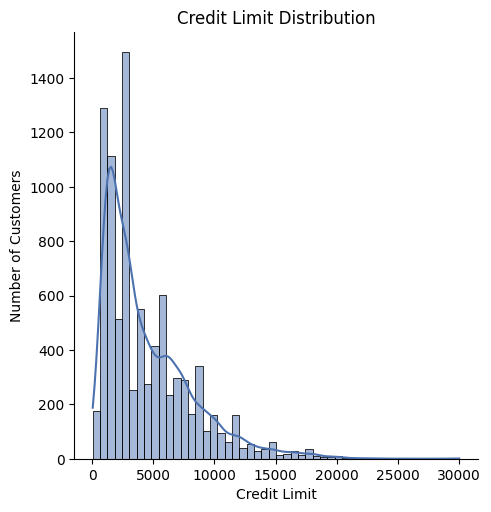

In [234]:
# Membuat plot untuk melihat distribusi CREDIT_LIMIT
sns.set_palette("deep")

sns.displot(data=df_cc, x='CREDIT_LIMIT', kde=True, bins=50)
    
plt.xlabel('Credit Limit')
plt.ylabel('Number of Customers')
plt.title('Credit Limit Distribution')

plt.show()

In [235]:
# Data distribusi credit limit mengarah miring ke kanan
# Menggunakan nilai median untuk mengisi missing value
df_cc['CREDIT_LIMIT'] = df_cc['CREDIT_LIMIT'].fillna(df_cc['CREDIT_LIMIT'].median())

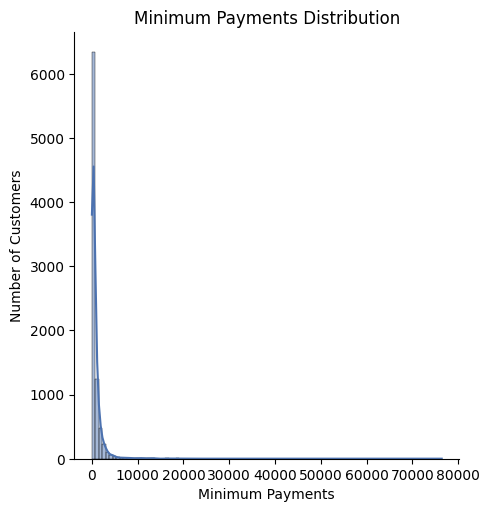

In [236]:
# Membuat Plot untuk melihat distribusi MINIMUM_PAYMENTS
palette = "deep" 
sns.set_palette(palette)

sns.displot(data=df_cc, x='MINIMUM_PAYMENTS', kde=True, bins=100)
    
plt.xlabel('Minimum Payments')
plt.ylabel('Number of Customers')
plt.title('Minimum Payments Distribution')

plt.show()

In [237]:
# Data distribusi minimum payment mengarah miring ke kanan
# Menggunakan nilai median untuk mengisi missing value
df_cc['MINIMUM_PAYMENTS'] = df_cc['MINIMUM_PAYMENTS'].fillna(df_cc['MINIMUM_PAYMENTS'].median())

In [238]:
df_cc.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [239]:
# Melakukan drop pada kolom yang tidak diperlukan
df_cc.drop('CUST_ID',inplace=True,axis=1)

df_cc.head(5)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## Visualisasi Data

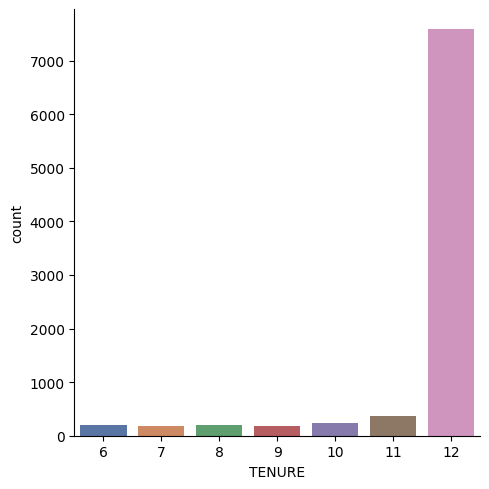

In [240]:
sns.catplot(
    data = df_cc,
    x = 'TENURE',
    kind = 'count'
)

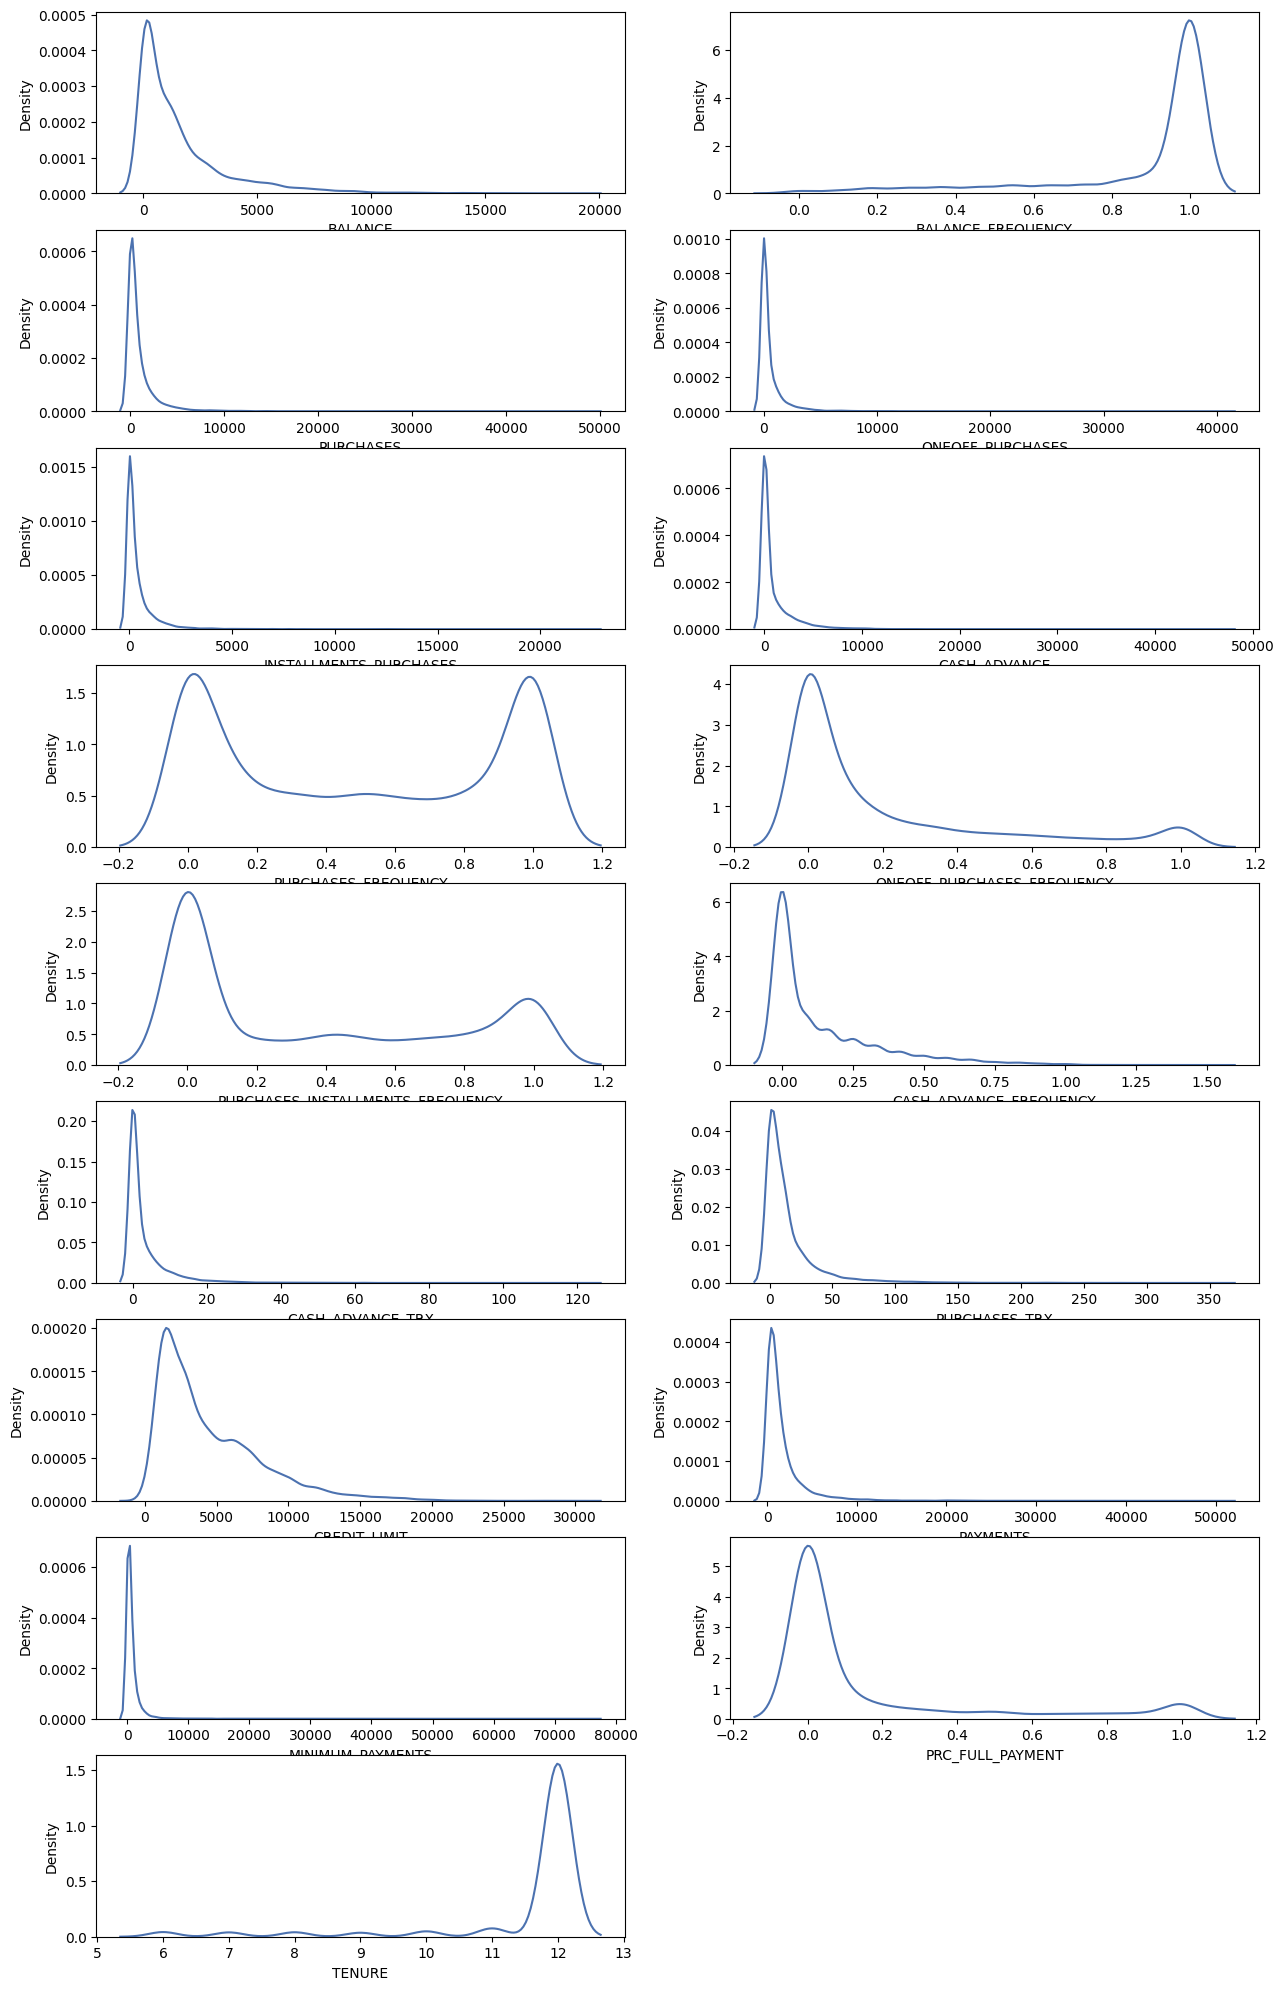

In [241]:
plt.figure(figsize=(15,25))
for i, col in enumerate(df_cc.columns):
    if df_cc[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(df_cc[col], ax=ax)
        plt.xlabel(col)
        
plt.show()

Seperti yang terlihat pada visualisasi diatas, terdapat kecondongan (skewness). Kecondongan ini dapat dikurangi dengan menggunakan transformasi logaritmik untuk menekan nilai tinggi yang melebihi batas nilai yang lebih rendah.

### Handle Skewness

In [242]:
positively_skewed_cols = ['BALANCE', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
                          'ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_TRX',
                          'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']

In [243]:
df_cc_test = df_cc.copy()
for col in positively_skewed_cols:
    df_cc_test[col] = np.log(1 + df_cc_test[col])

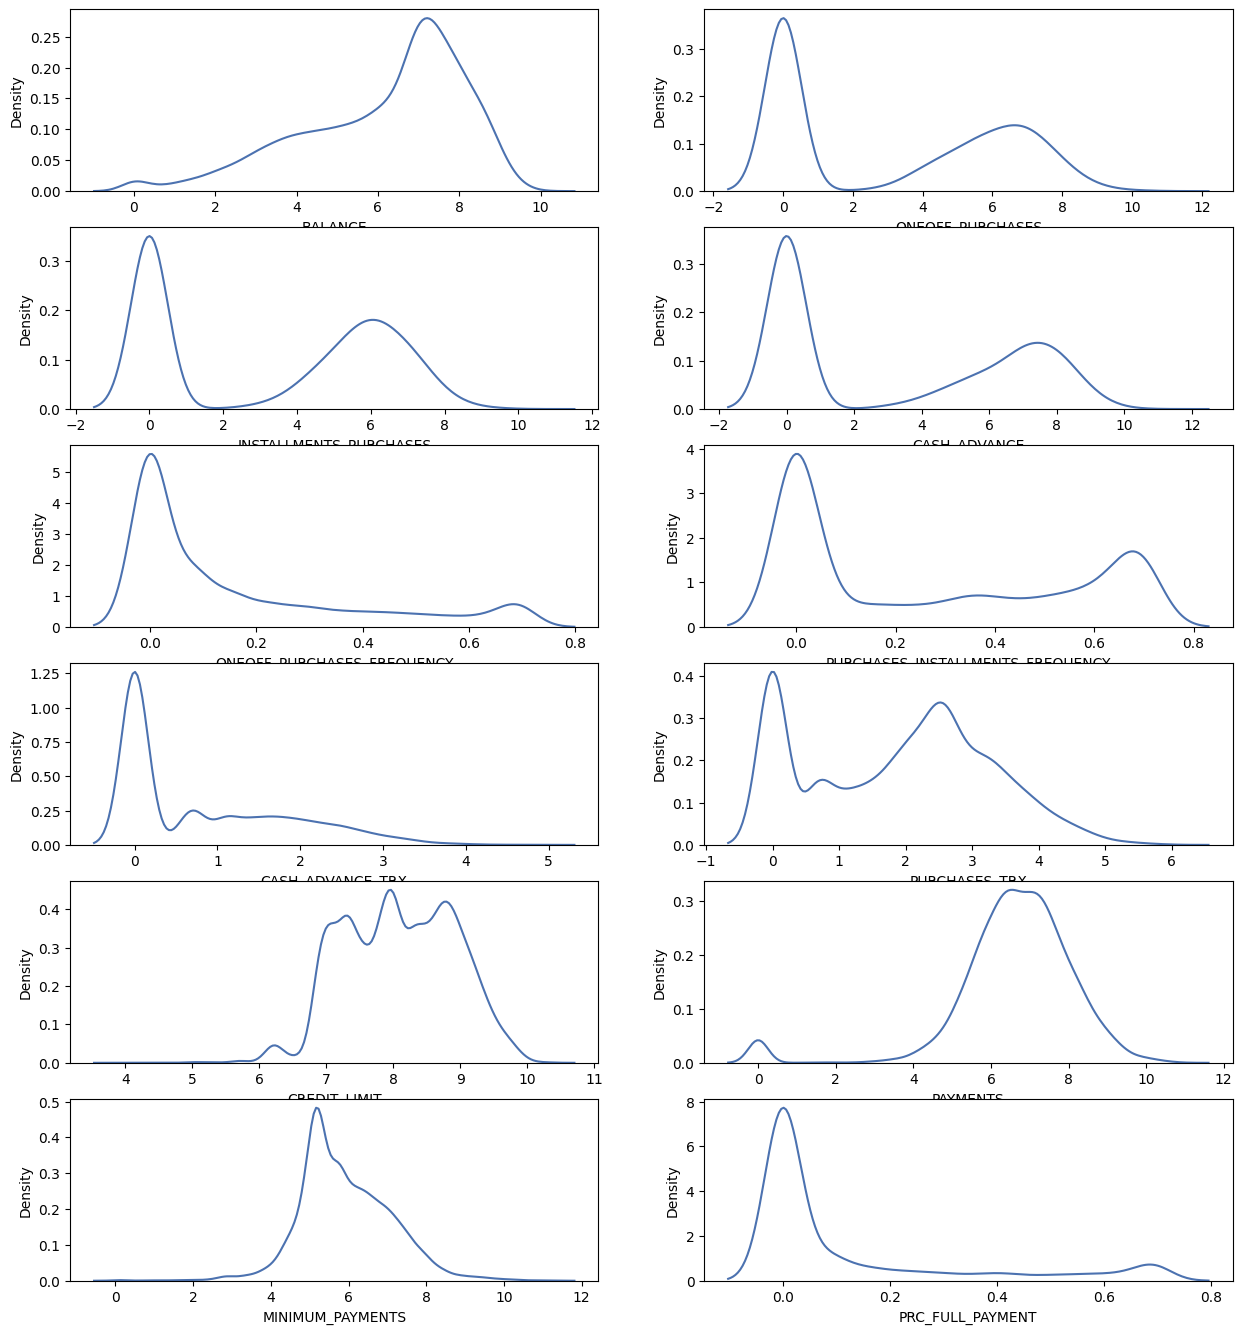

In [244]:
plt.figure(figsize=(15,25))
for i, col in enumerate(positively_skewed_cols):
    ax = plt.subplot(9, 2, i+1)
    sns.kdeplot(df_cc_test[col], ax=ax)
    plt.xlabel(col)
plt.show()

### Heat Map Correlation

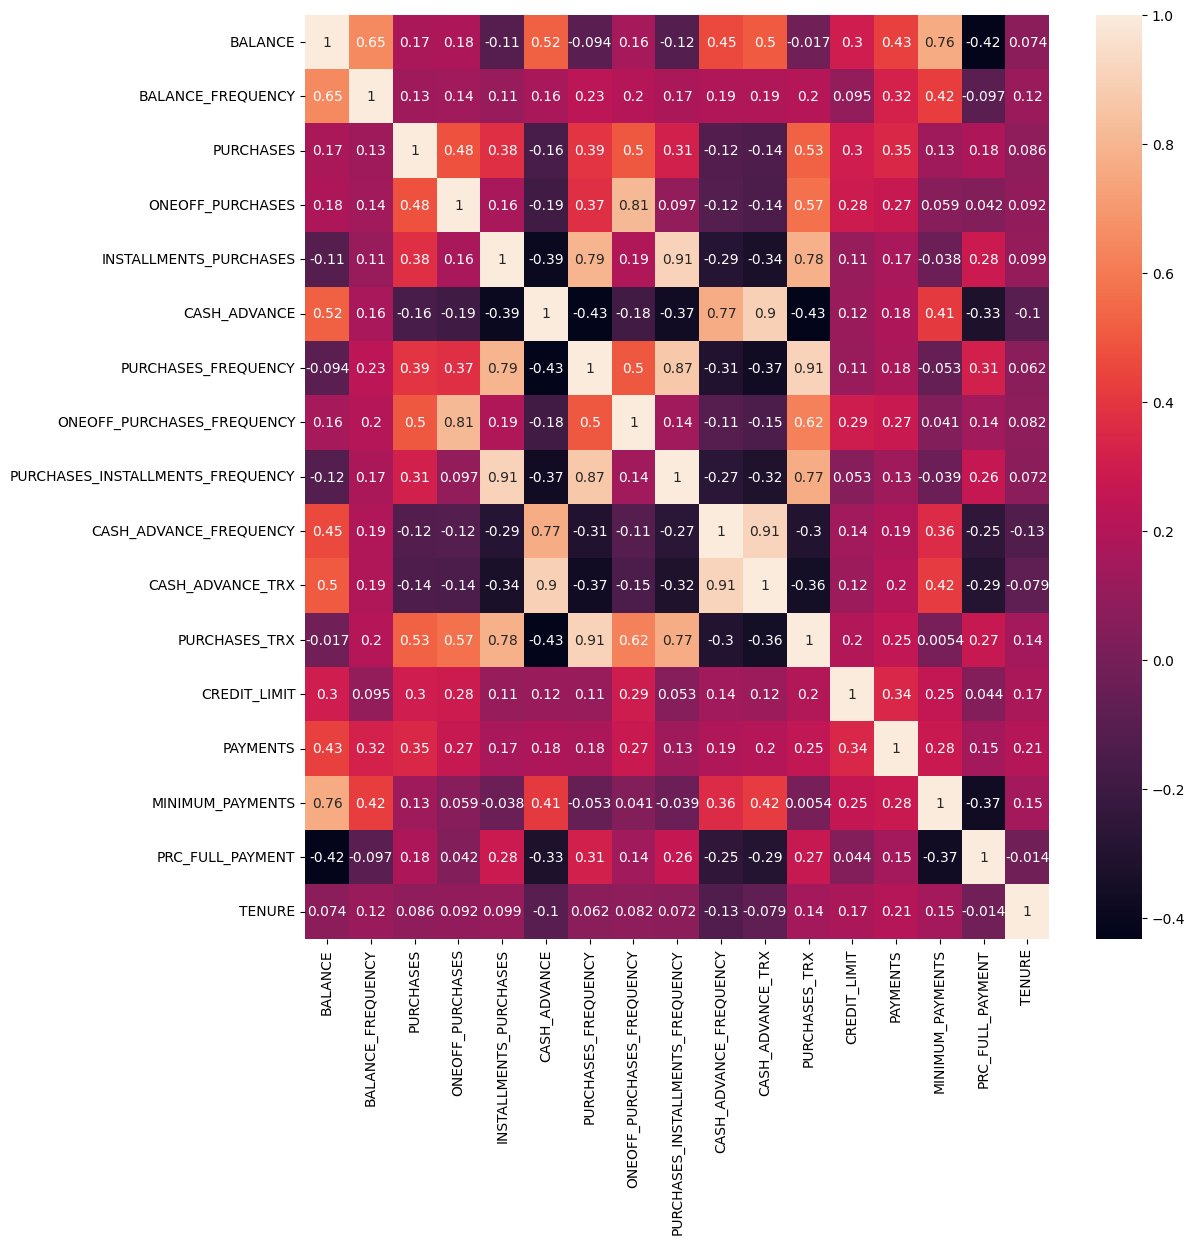

In [245]:
plt.figure(figsize=(12,12))
sns.heatmap(df_cc_test.corr(), annot=True)
plt.show()

In [246]:
# Menggunakan PCA untuk mengurangi dimensi data, karena terdapat correlated features pada dataset
pca = PCA(n_components=0.95)
data = pca.fit_transform(df_cc_test)

### Modeling & Cluster

In [247]:
n_clusters=15
inertia=[]
for i in range(1,n_clusters):
    kmean= KMeans(n_clusters=i,random_state=23)
    kmean.fit(data)
    inertia.append(kmean.inertia_) 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

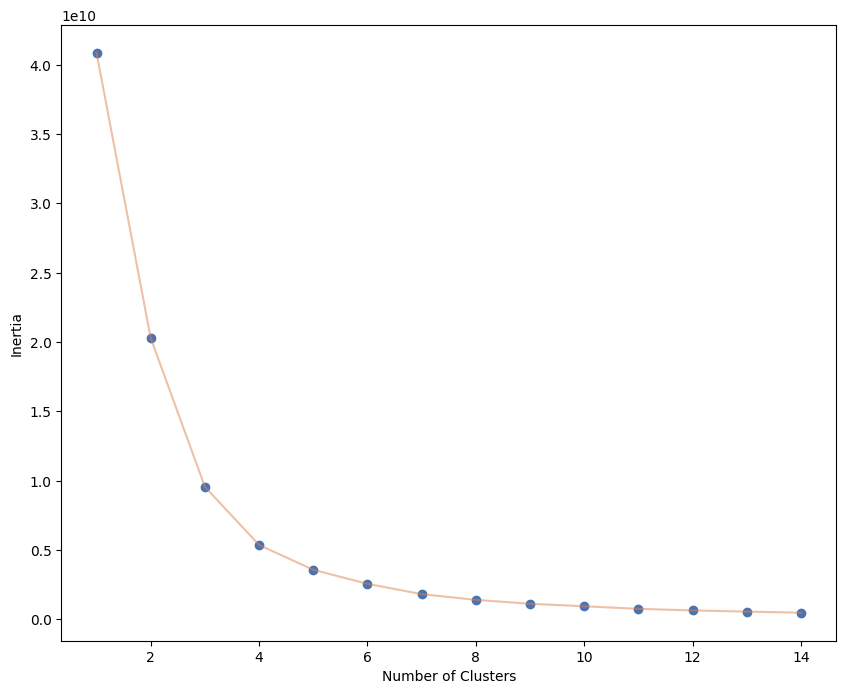

In [248]:
plt.figure(1 , figsize = (10 ,8))
plt.plot(np.arange(1 , n_clusters) , inertia , 'o')
plt.plot(np.arange(1 , n_clusters) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [249]:
# Membuat cluster dengan nilai titik lengkungan, yaitu 4
kmean= KMeans(n_clusters=4)
kmean.fit(data)
labels=kmean.labels_

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [250]:
clusters=pd.concat([df_cc, pd.DataFrame({'cluster':labels})], axis=1)
clusters.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2


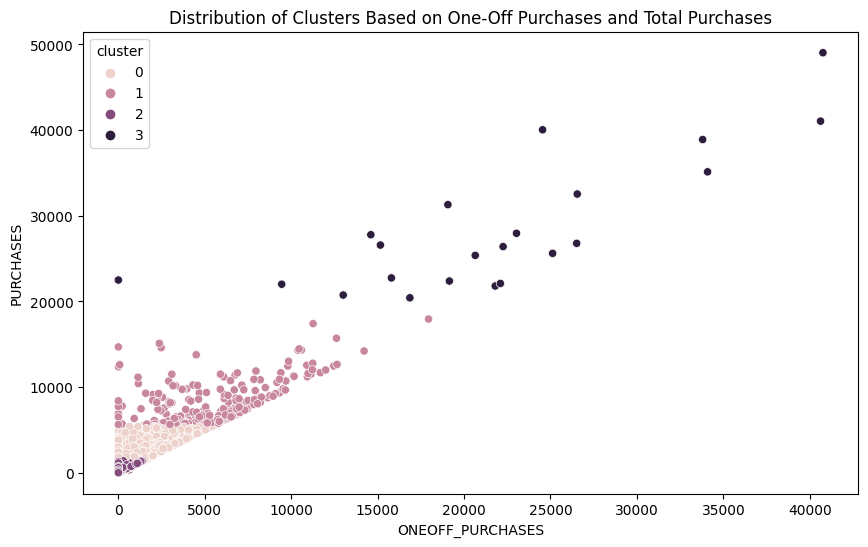

In [251]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=clusters, x='ONEOFF_PURCHASES', y='PURCHASES', hue='cluster')
plt.title('Distribution of Clusters Based on One-Off Purchases and Total Purchases')
plt.show()

### Kesimpulan Akhir
Berdasarkan hasil clustering diatas, kita sudah membagi data menjadi 4 cluster berdasarkan pola serta karakter pada data. Algoritma K-Means Clustering mencari kesamaan pada suatu objek dan mengelompokkannya kedalam sebuah cluster.